In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(21.7,15.27)}, font_scale=2)
plt.xkcd()

In [252]:
indict = {'Saeed':'63368', 'Michael':'10001', 'Tyler':'63119', 'Fariborz': '90068', 'Athena':'02118'}

In [253]:
indict[i]

'02118'

In [254]:
%%time
from noaa_sdk import NOAA
n = NOAA()
observations = {}

for i in indict:
    observations[i] = pd.DataFrame(list(n.get_observations(indict[i], 'US')))


Wall time: 47.8 s


In [276]:
def get_value(x):
    return x['value']

for i in indict:
    observations[i]['temperature_value'] = observations[i]['temperature'].apply(lambda x: get_value(x))
    observations[i]['temperature_value'] = observations[i]['temperature_value'] * 9/5 + 32

    observations[i]['timestamp'] = pd.to_datetime(observations[i]['timestamp'], infer_datetime_format=True)
    observations[i]['timestamp'] = pd.DatetimeIndex(observations[i]['timestamp']).tz_convert('US/Central')

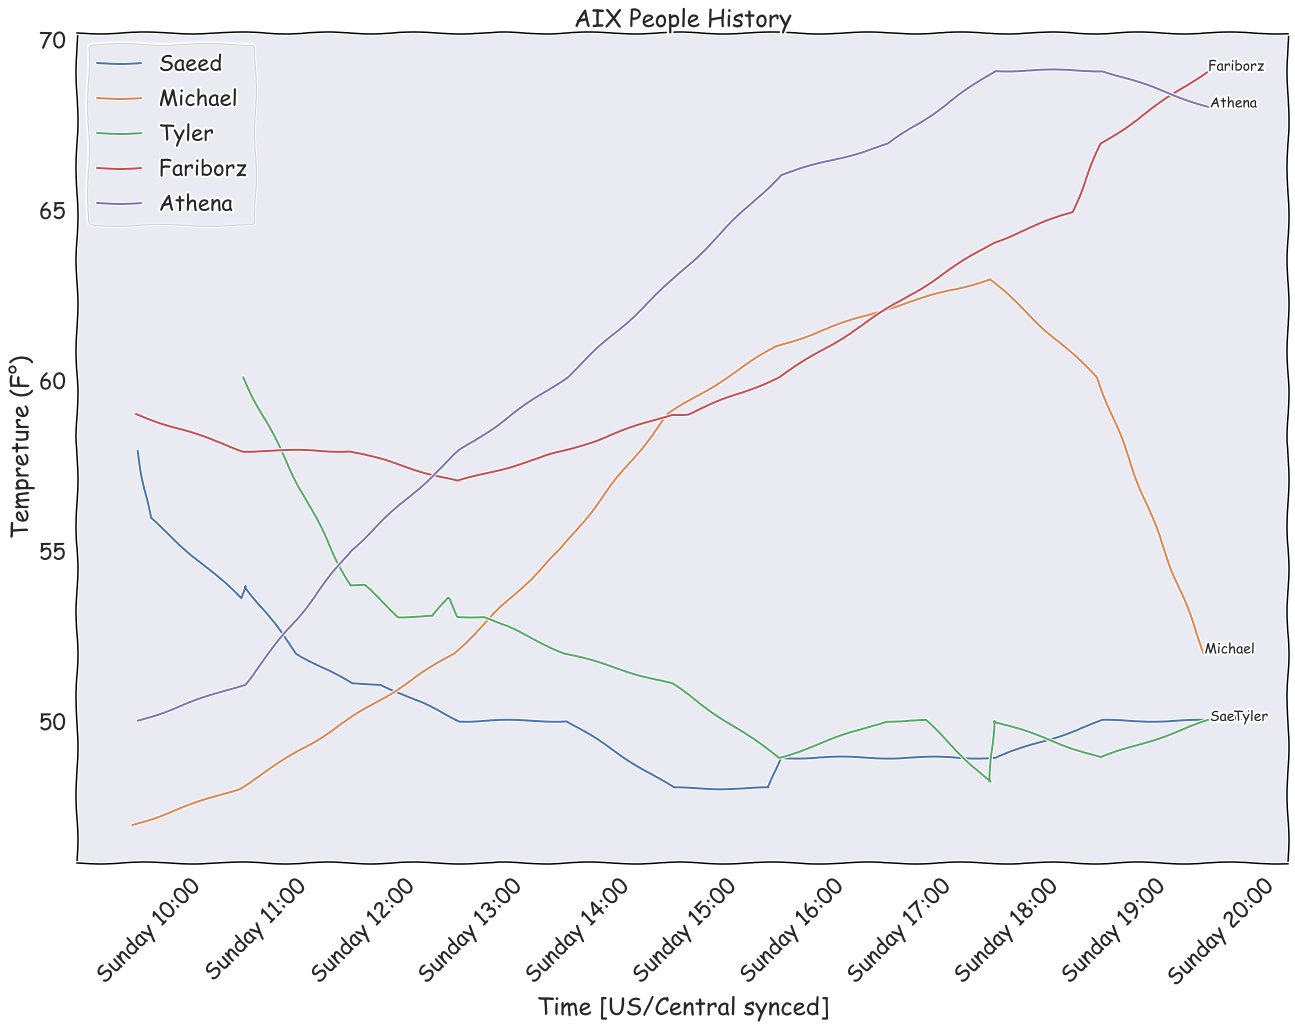

In [278]:
timewin = 10

for i in indict:
    ax= sns.lineplot(x='timestamp', y='temperature_value', data=observations[i][observations[i]['timestamp'] >= (observations[i]['timestamp'][0] - pd.DateOffset(hours=timewin))], label= i)
    plt.annotate(i, xy=(observations[i]['timestamp'][0], observations[i]['temperature_value'][0]))
    
import matplotlib.dates as mdates
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
myFmt = mdates.DateFormatter('%A %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_title('AIX People History')
ax.set_xlabel('Time [US/Central synced]')
ax.set_ylabel('Tempreture (F°)')

ax.legend()

In [266]:
%%time
from noaa_sdk import NOAA
n = NOAA()
predictions = {}

for i in indict:
    predictions[i] = pd.DataFrame(n.get_forecasts(indict[i], 'US'))

Wall time: 32.7 s


In [267]:
for i in indict:
    predictions[i]['startTime'] = pd.DatetimeIndex(predictions[i]['startTime']).tz_convert('US/Central')

In [41]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

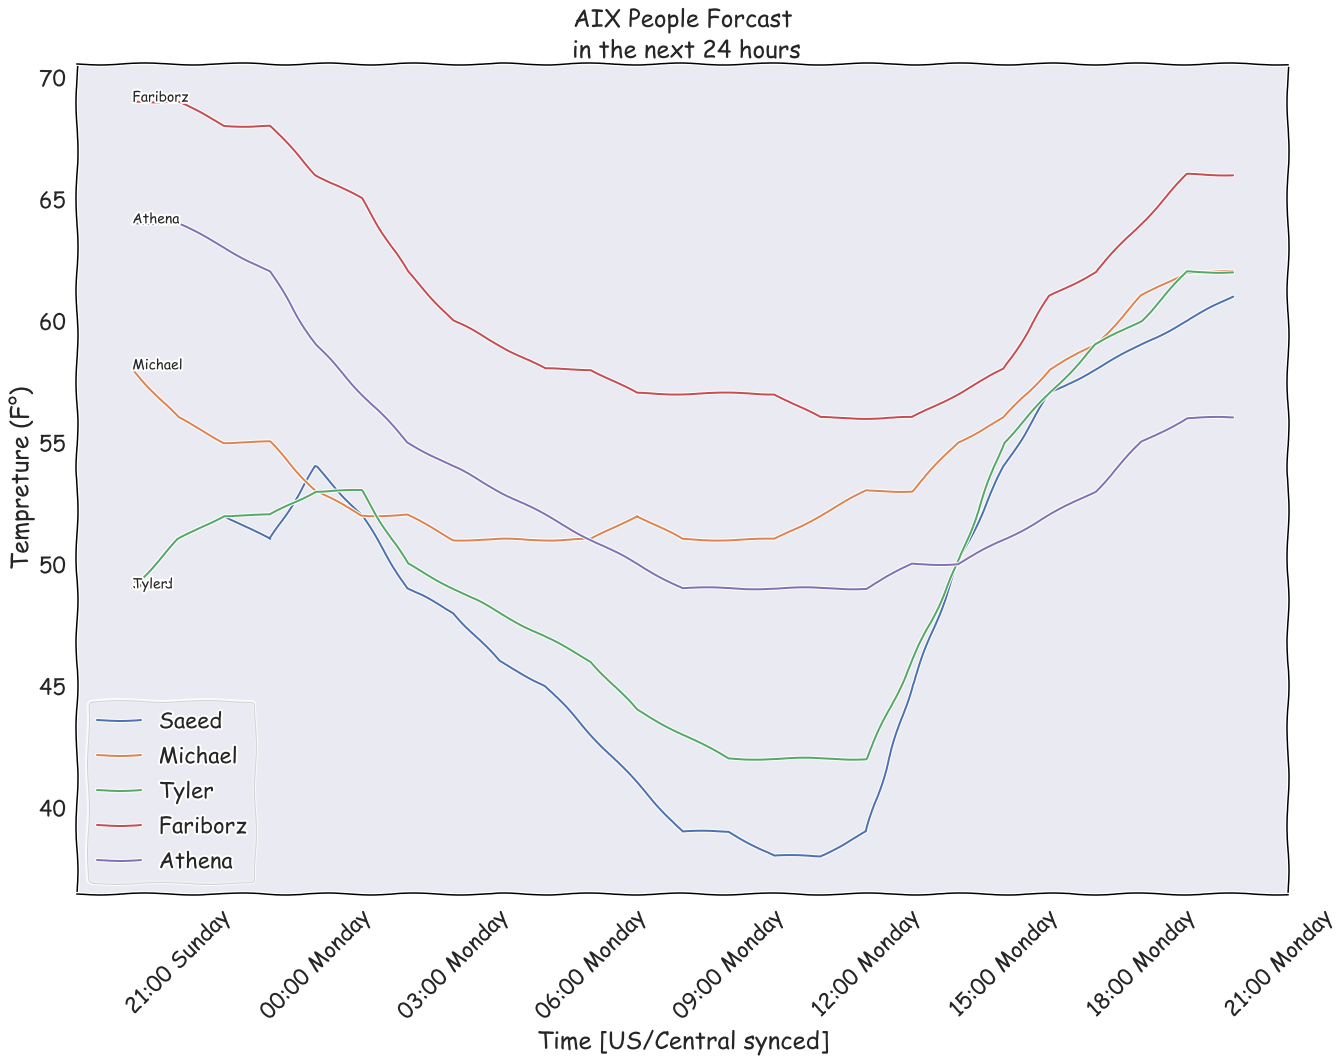

In [275]:
timewin = 24

for i in indict:
    ax= sns.lineplot(x='startTime', y='temperature', data=predictions[i][predictions[i]['startTime'] <= (predictions[i]['startTime'][0] + pd.DateOffset(hours=timewin))], label= i)
    plt.annotate(i, xy=(predictions[i]['startTime'][0], predictions[i]['temperature'][0]))
    
    
import matplotlib.dates as mdates
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
myFmt = mdates.DateFormatter('%H:%M %A')
ax.xaxis.set_major_formatter(myFmt)
ax.set_title('AIX People Forcast\n in the next 24 hours')
ax.set_xlabel('Time [US/Central synced]')
ax.set_ylabel('Tempreture (F°)')
ax.legend()